# **Building Lookies TensorFlow Model for Classifying Indonesian Traditional Cakes**

As an Indonesian citizen, everyone has an obligation to protect, care for, and preserve Indonesian culture. Preserving the culture can start from knowing and understanding. Both tourists and locals find it difficult to know the Indonesian traditional cakes, whether their name, recipe, or origin. Why are traditional cakes rarely found in public? How well does technology support traditional Indonesian cake information to provide wider introduction in society? This application is used to know deeper about those cakes by pointing the camera device at the cakes, then the information will be given on the screen. This application will definitely help to find out the Indonesian traditional cakes’ information. In this notebook, we will guide you through so you can replicate our model development process step by step.

In order to start building the model, we need all of these imports. Don't forget to run the cell below to continue working with the model.

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.5 MB/s 


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from efficientnet.tfkeras import EfficientNetB3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download The Dataset from Kaggle

The dataset was obtained from [Kue Indonesia Dataset on Kaggle](https://www.kaggle.com/datasets/ilhamfp31/kue-indonesia), Google Search, and self-captured images. All of the images then were compiled into one directory which can be found on [Kaggle](https://kaggle.com/datasets/widyaameliaputri/indonesian-traditional-cakes) as well. In order to use the dataset, we need to get an API token from our profile on Kaggle to automatically download the JSON file which will be uploaded on Google Colab. We download and unzip the dataset afterwards, and the images are ready to be processed.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"widyaameliaputri","key":"30f88046fb169144a893461a5404021d"}'}

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d widyaameliaputri/indonesian-traditional-cakes

 96% 314M/326M [00:02<00:00, 151MB/s]
100% 326M/326M [00:02<00:00, 146MB/s]


In [ ]:
!unzip -qq /content/indonesian-traditional-cakes.zip

# Count and View Images

In this section, we will count the number of images in each cake's and show the sample of each of them. First, we will define the directories of each cake for training, validation, and testing set.

In [ ]:
#Define the directories
train_dir = '/content/Dataset/train/'
validation_dir = "/content/Dataset/validation/"
test_dir = "/content/Dataset/test/"

train_dadar_gulung_dir = os.path.join(train_dir, "kue_dadar_gulung")
train_kastengel_dir = os.path.join(train_dir, "kue_kastengel")
train_klepon_dir = os.path.join(train_dir, "kue_klepon")
train_lapis_dir = os.path.join(train_dir, "kue_lapis")
train_lumpur_dir = os.path.join(train_dir, "kue_lumpur")
train_putri_salju_dir = os.path.join(train_dir, "kue_putri_salju")
train_risoles_dir = os.path.join(train_dir, "kue_risoles")
train_serabi_dir = os.path.join(train_dir, "kue_serabi")
train_pastel_dir = os.path.join(train_dir, 'kue_pastel')
train_lemper_dir = os.path.join(train_dir, 'kue_lemper')
train_putu_ayu_dir = os.path.join(train_dir, 'kue_putu_ayu')
train_nagasari_dir = os.path.join(train_dir, 'kue_nagasari')
train_ape_dir = os.path.join(train_dir,'kue_ape')
train_gethuk_dir = os.path.join(train_dir, 'kue_gethuk_lindri')
train_cenil_dir = os.path.join(train_dir, 'kue_cenil')
train_bika_ambon_dir = os.path.join(train_dir, 'kue_bika_ambon')

val_dadar_gulung_dir = os.path.join(validation_dir, "kue_dadar_gulung")
val_kastengel_dir = os.path.join(validation_dir, "kue_kastengel")
val_klepon_dir = os.path.join(validation_dir, "kue_klepon")
val_lapis_dir = os.path.join(validation_dir, "kue_lapis")
val_lumpur_dir = os.path.join(validation_dir, "kue_lumpur")
val_putri_salju_dir = os.path.join(validation_dir, "kue_putri_salju")
val_risoles_dir = os.path.join(validation_dir, "kue_risoles")
val_serabi_dir = os.path.join(validation_dir, "kue_serabi")
val_pastel_dir = os.path.join(validation_dir, 'kue_pastel')
val_lemper_dir = os.path.join(validation_dir, 'kue_lemper')
val_putu_ayu_dir = os.path.join(validation_dir, 'kue_putu_ayu')
val_nagasari_dir = os.path.join(validation_dir, 'kue_nagasari')
val_ape_dir = os.path.join(validation_dir,'kue_ape')
val_gethuk_dir = os.path.join(validation_dir, 'kue_gethuk_lindri')
val_cenil_dir = os.path.join(validation_dir, 'kue_cenil')
val_bika_ambon_dir = os.path.join(validation_dir, 'kue_bika_ambon')

test_dadar_gulung_dir = os.path.join(test_dir, "kue_dadar_gulung")
test_kastengel_dir = os.path.join(test_dir, "kue_kastengel")
test_klepon_dir = os.path.join(test_dir, "kue_klepon")
test_lapis_dir = os.path.join(test_dir, "kue_lapis")
test_lumpur_dir = os.path.join(test_dir, "kue_lumpur")
test_putri_salju_dir = os.path.join(test_dir, "kue_putri_salju")
test_risoles_dir = os.path.join(test_dir, "kue_risoles")
test_serabi_dir = os.path.join(test_dir, "kue_serabi")
test_pastel_dir = os.path.join(test_dir, 'kue_pastel')
test_lemper_dir = os.path.join(test_dir, 'kue_lemper')
test_putu_ayu_dir = os.path.join(test_dir, 'kue_putu_ayu')
test_nagasari_dir = os.path.join(test_dir, 'kue_nagasari')
test_ape_dir = os.path.join(test_dir,'kue_ape')
test_gethuk_dir = os.path.join(test_dir, 'kue_gethuk_lindri')
test_cenil_dir = os.path.join(test_dir, 'kue_cenil')
test_bika_ambon_dir = os.path.join(test_dir, 'kue_bika_ambon')

Next, we will count the number of images in each directory that we declared before.

In [ ]:
#Counting the numbers of images in each directory
print("The Number of Images in Training Set")
print("Dadar Gulung:", len(os.listdir(train_dadar_gulung_dir)))
print("Kastengel:", len(os.listdir(train_kastengel_dir)))
print("Klepon:", len(os.listdir(train_klepon_dir)))
print("Lapis:", len(os.listdir(train_lapis_dir)))
print("Lumpur:", len(os.listdir(train_lumpur_dir)))
print("Putri Salju:", len(os.listdir(train_putri_salju_dir)))
print("Risoles:", len(os.listdir(train_risoles_dir)))
print("Serabi:", len(os.listdir(train_serabi_dir)))
print('Pastel :', len(os.listdir(train_pastel_dir)))
print('Lemper :', len(os.listdir(train_lemper_dir)))
print('Putu Ayu:', len(os.listdir(train_putu_ayu_dir)))
print('Nagasari:', len(os.listdir(train_nagasari_dir)))
print('Kue Ape:', len(os.listdir(train_ape_dir)))
print('Gethuk Lindri:', len(os.listdir(train_gethuk_dir)))
print('Bika Ambon:', len(os.listdir(train_bika_ambon_dir)))
print('Cenil:', len(os.listdir(train_cenil_dir)))

print("\nThe Number of Images in Validation Set")
print("Dadar Gulung:", len(os.listdir(val_dadar_gulung_dir)))
print("Kastengel:", len(os.listdir(val_kastengel_dir)))
print("Klepon:", len(os.listdir(val_klepon_dir)))
print("Lapis:", len(os.listdir(val_lapis_dir)))
print("Lumpur:", len(os.listdir(val_lumpur_dir)))
print("Putri Salju:", len(os.listdir(val_putri_salju_dir)))
print("Risoles:", len(os.listdir(val_risoles_dir)))
print("Serabi:", len(os.listdir(val_serabi_dir)))
print('Pastel :', len(os.listdir(val_pastel_dir)))
print('Lemper :', len(os.listdir(val_lemper_dir)))
print('Putu Ayu:', len(os.listdir(val_putu_ayu_dir)))
print('Nagasari:', len(os.listdir(val_nagasari_dir)))
print('Kue Ape:', len(os.listdir(val_ape_dir)))
print('Gethuk Lindri:', len(os.listdir(val_gethuk_dir)))
print('Bika Ambon:', len(os.listdir(val_bika_ambon_dir)))
print('Cenil:', len(os.listdir(val_cenil_dir)))


print("\nThe Number of Images in Test Set")
print("Dadar Gulung:", len(os.listdir(test_dadar_gulung_dir)))
print("Kastengel:", len(os.listdir(test_kastengel_dir)))
print("Klepon:", len(os.listdir(test_klepon_dir)))
print("Lapis:", len(os.listdir(test_lapis_dir)))
print("Lumpur:", len(os.listdir(test_lumpur_dir)))
print("Putri Salju:", len(os.listdir(test_putri_salju_dir)))
print("Risoles:", len(os.listdir(test_risoles_dir)))
print("Serabi:", len(os.listdir(test_serabi_dir)))
print('Pastel :', len(os.listdir(test_pastel_dir)))
print('Lemper :', len(os.listdir(test_lemper_dir)))
print('Putu Ayu:', len(os.listdir(test_putu_ayu_dir)))
print('Nagasari:', len(os.listdir(test_nagasari_dir)))
print('Kue Ape:', len(os.listdir(test_ape_dir)))
print('Gethuk Lindri:', len(os.listdir(test_gethuk_dir)))
print('Bika Ambon:', len(os.listdir(test_bika_ambon_dir)))
print('Cenil:', len(os.listdir(test_cenil_dir)))

The Number of Images in Training Set
Dadar Gulung: 192
Kastengel: 181
Klepon: 200
Lapis: 201
Lumpur: 208
Putri Salju: 184
Risoles: 196
Serabi: 181
Pastel : 191
Lemper : 140
Putu Ayu: 190
Nagasari: 190
Kue Ape: 105
Gethuk Lindri: 180
Bika Ambon: 164
Cenil: 163

The Number of Images in Validation Set
Dadar Gulung: 20
Kastengel: 20
Klepon: 20
Lapis: 20
Lumpur: 20
Putri Salju: 20
Risoles: 20
Serabi: 20
Pastel : 20
Lemper : 20
Putu Ayu: 20
Nagasari: 20
Kue Ape: 20
Gethuk Lindri: 20
Bika Ambon: 20
Cenil: 20

The Number of Images in Test Set
Dadar Gulung: 20
Kastengel: 20
Klepon: 20
Lapis: 20
Lumpur: 20
Putri Salju: 20
Risoles: 20
Serabi: 20
Pastel : 20
Lemper : 20
Putu Ayu: 20
Nagasari: 20
Kue Ape: 20
Gethuk Lindri: 20
Bika Ambon: 20
Cenil: 20


After that, we will show the sample of each cake using `plt.imshow` and `plt.show()`.


Sample dadar gulung image:


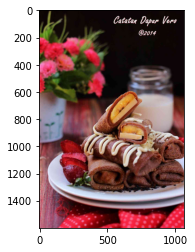


Kastengel image:


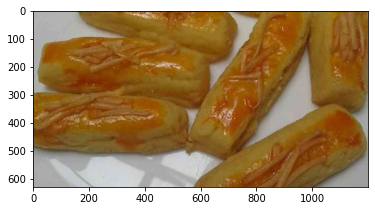


Sample klepon image:


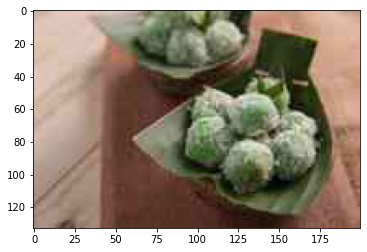


Sample lapis image:


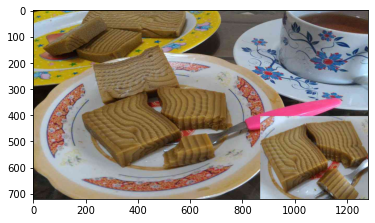


Sample lumpur image:


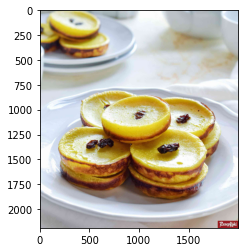


Sample putri salju image:


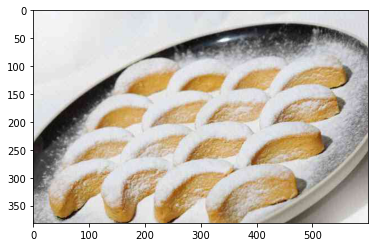


Sample risoles image:


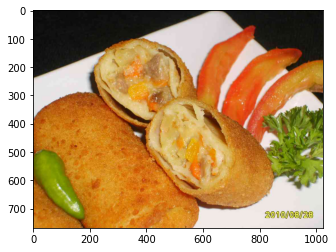


Sample serabi image:


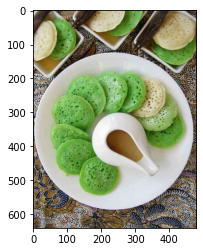


Sample pastel image:


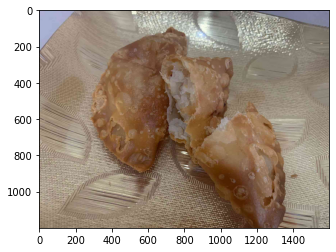


Sample lemper image:


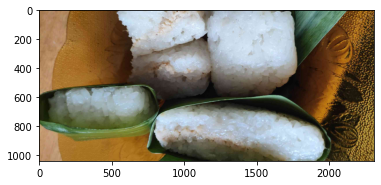


Sample putu ayu image:


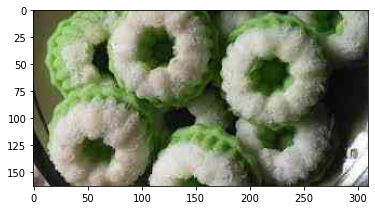


Sample nagasari image:


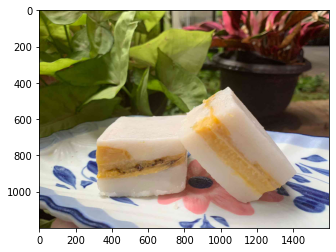


Sample kue ape image:


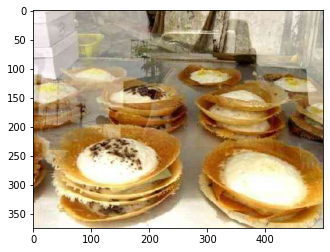


Sample gethuk lindri image:


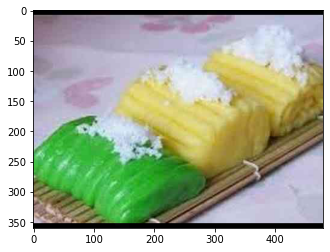


Sample bika ambon image:


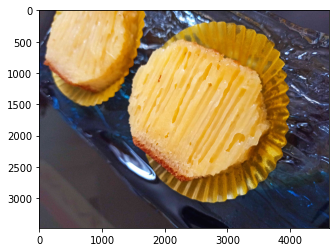


Sample cenil image:


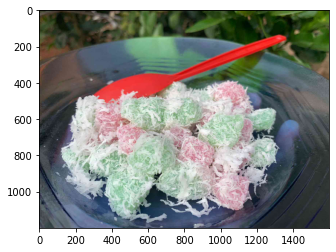

In [ ]:
#Showing sample of each cake's class
print("Sample dadar gulung image:")
plt.imshow(load_img(f"{os.path.join(train_dadar_gulung_dir, os.listdir(train_dadar_gulung_dir)[0])}"))
plt.show()

print("\nKastengel image:")
plt.imshow(load_img(f"{os.path.join(train_kastengel_dir, os.listdir(train_kastengel_dir)[0])}"))
plt.show()

print("\nSample klepon image:")
plt.imshow(load_img(f"{os.path.join(train_klepon_dir, os.listdir(train_klepon_dir)[0])}"))
plt.show()

print("\nSample lapis image:")
plt.imshow(load_img(f"{os.path.join(train_lapis_dir, os.listdir(train_lapis_dir)[0])}"))
plt.show()

print("\nSample lumpur image:")
plt.imshow(load_img(f"{os.path.join(train_lumpur_dir, os.listdir(train_lumpur_dir)[0])}"))
plt.show()

print("\nSample putri salju image:")
plt.imshow(load_img(f"{os.path.join(train_putri_salju_dir, os.listdir(train_putri_salju_dir)[0])}"))
plt.show()

print("\nSample risoles image:")
plt.imshow(load_img(f"{os.path.join(train_risoles_dir, os.listdir(train_risoles_dir)[0])}"))
plt.show()

print("\nSample serabi image:")
plt.imshow(load_img(f"{os.path.join(train_serabi_dir, os.listdir(train_serabi_dir)[0])}"))
plt.show()

print("\nSample pastel image:")
plt.imshow(load_img(f"{os.path.join(train_pastel_dir, os.listdir(train_pastel_dir)[0])}"))
plt.show()

print("\nSample lemper image:")
plt.imshow(load_img(f"{os.path.join(train_lemper_dir, os.listdir(train_lemper_dir)[0])}"))
plt.show()

print("\nSample putu ayu image:")
plt.imshow(load_img(f"{os.path.join(train_putu_ayu_dir, os.listdir(train_putu_ayu_dir)[0])}"))
plt.show()

print("\nSample nagasari image:")
plt.imshow(load_img(f"{os.path.join(train_nagasari_dir, os.listdir(train_nagasari_dir)[0])}"))
plt.show()

print("\nSample kue ape image:")
plt.imshow(load_img(f"{os.path.join(train_ape_dir, os.listdir(train_ape_dir)[0])}"))
plt.show()

print("\nSample gethuk lindri image:")
plt.imshow(load_img(f"{os.path.join(train_gethuk_dir, os.listdir(train_gethuk_dir)[0])}"))
plt.show()

print("\nSample bika ambon image:")
plt.imshow(load_img(f"{os.path.join(train_bika_ambon_dir, os.listdir(train_bika_ambon_dir)[0])}"))
plt.show()

print("\nSample cenil image:")
plt.imshow(load_img(f"{os.path.join(train_cenil_dir, os.listdir(train_cenil_dir)[0])}"))
plt.show()

#Image Augmentation

Image augmentation is used to increase dataset  size by shearing, rotating, zooming, changing brightness, shifting the width & height, and flipping. Feel free to tune the parameter values. We also rescale the image using `rescale=1./25`5 to normalize the pixel value. Neural Networks are more friendly with small numbers.

Lastly, using `flow_from_directory()`, we set the `batch_size=128`.

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
  train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
  validation_datagen    = ImageDataGenerator(rescale = 1.0/255.0)
  validation_generator  = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150,150))
  testing_datagen   = ImageDataGenerator(rescale = 1.0/255.0)
  testing_generator = testing_datagen.flow_from_directory(directory=TESTING_DIR,
                                                          batch_size=32,
                                                          class_mode='categorical',
                                                          target_size=(150,150))
  return train_generator, validation_generator, testing_generator


In [ ]:
train_generator, validation_generator, testing_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 2859 images belonging to 16 classes.
Found 320 images belonging to 16 classes.
Found 317 images belonging to 16 classes.


# Pre-Trained Model

EfficientNetB3 is chosen to be used as a pre-trained model because its accuracies are around 90% without fine-tuning it. We want to add some layers and don't want to train the layers on the pre-trained model. Thus, we set `layer_trainable = False` on `create_pretrained_model()` function.

In [ ]:
def create_pretrained_model():
  pretrained_model = EfficientNetB3(include_top=False,
                                   weights="imagenet",
                                   input_shape=(150,150,3))
  for layer in pretrained_model.layers:
    layer.trainable = False
  return pretrained_model

In [ ]:
pretrained_model = create_pretrained_model()

44122112/44107200 [==============================] - 0s 0us/step


In [ ]:
def output_of_last_layer(pretrained_model):
  last_desired_layer = pretrained_model.get_layer('top_activation') #avg_pool diganti top_activation biar bisa ditambah layer CNN sama MaxPool
  print('Last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('Last layer output: ', last_output)
  return last_output

In [ ]:
last_output = output_of_last_layer(pretrained_model)

Last layer output shape:  (None, 5, 5, 1536)
Last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1536), dtype=tf.float32, name=None), name='top_activation/mul:0', description="created by layer 'top_activation'")


#Create The Model

We create function `create_model` contains the final model by adding some additional layers after the pre-trained model. In the first layer, we had a pre-trained model. Next, we had `Conv2D` layer,`GlobalAveragePooling2D`layer, `Dense` layer, `Dropout`, and `output` layer. 

For this project, we use `Adam` optimizers as an optimizer and `categorical_crossentropy` as a loss function.

In [ ]:
def create_model(pretrained_model, last_output):
  x = layers.Conv2D(2048, (2,2), activation = 'relu')(last_output)
  x = layers.Conv2D(1024, (2,2), activation = 'relu')(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation = 'relu')(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(256, activation = 'relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(16, activation = 'softmax')(x)

  model = Model(inputs=pretrained_model.input, outputs=x)

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

In [ ]:
model = create_model(pretrained_model, last_output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 40)   1080        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 75, 75, 40)   0           ['stem_bn[0][0]']            

Now, we can train the model.

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
23/23 [==============================] - 121s 4s/step - loss: 2.4029 - accuracy: 0.2725 - val_loss: 1.3453 - val_accuracy: 0.6281
Epoch 2/15
23/23 [==============================] - 99s 4s/step - loss: 1.2776 - accuracy: 0.6097 - val_loss: 0.7477 - val_accuracy: 0.7875
Epoch 3/15
23/23 [==============================] - 98s 4s/step - loss: 0.9239 - accuracy: 0.7475 - val_loss: 0.6037 - val_accuracy: 0.8344
Epoch 4/15
23/23 [==============================] - 100s 4s/step - loss: 0.7288 - accuracy: 0.7901 - val_loss: 0.5062 - val_accuracy: 0.8687
Epoch 5/15
23/23 [==============================] - 97s 4s/step - loss: 0.6687 - accuracy: 0.8178 - val_loss: 0.4782 - val_accuracy: 0.8750
Epoch 6/15
23/23 [==============================] - 96s 4s/step - loss: 0.5858 - accuracy: 0.8388 - val_loss: 0.4599 - val_accuracy: 0.8750
Epoch 7/15
23/23 [==============================] - 95s 4s/step - loss: 0.5562 - accuracy: 0.8513 - val_loss: 0.4515 - val_accuracy: 0.8813
Epoch 8/15
23/23 [

# Accuracy and Loss Plot 

By using `matplotlib.pyplot` we will plot the accuracy and loss both for training and validation. As you can see, the result is pretty good (not really great). But, it's acceptable to use since our dataset is very small. To improve the model training, we planned to collect more dataset from our Lookies App users.

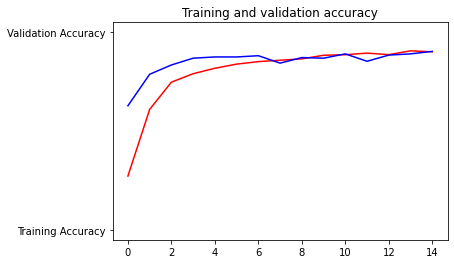

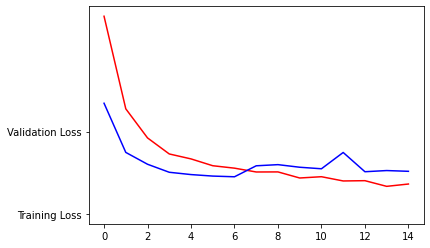

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# Test Model

We evaluate the model by using `testing_generator` to know how well the accuracy is in terms of predicting images.

In [ ]:
loss = model.evaluate(testing_generator, steps=10)

10/10 [==============================] - 10s 962ms/step - loss: 0.5339 - accuracy: 0.9085


# Save and Convert Model

The next step is save the model to Google Drive using `tf.saved_model.save` and conver the model to TensorFlow Lite using `tf.lite.TFLiteConverter.from_saved_model`. 

In [ ]:
#Define saved model path
saved_model_path = "/content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/saved_model"
tf.saved_model.save(model, saved_model_path)

#Convert the model
converted_model = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converted_model.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converted_model.convert()

#Save the model
os.makedirs('/content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/model_tflite')
with open('/content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/model_tflite/tflite_model.tflite', 'wb') as file:
  file.write(tflite_model)

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/saved_model/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Capstone Project/Machine Learning/Model-90-90-90/saved_model/assets


Once the files are already downloaded, we can use the `saved_model` folder to be deployed to cloud. We don't utilize the converted TensorFlow Lite model since it's downloaded to be an archived file merely.